# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [246]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [247]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

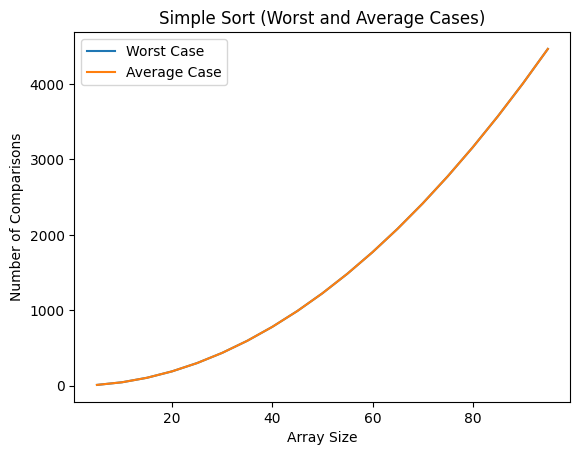

In [248]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a

# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

## Complexity Helper Functions

In [249]:
def genAsc(size):
    ret = []
    for i in range(size):
        ret.append(i)
    return ret

def genDes(size):
    ret = []
    for i in range(size):
        ret.append(size - i)
    return ret

def genRand(size):
    ret = list(range(size))
    random.shuffle(ret)
    return ret

def genMSWorst(size):
    ret = []
    for i in range(size):
        ret.append(1)
    return ret

def runSortingTrials(array_sizes, create_array_func, sort_func, num_trials=1):
    num_compares = []
    for n in array_sizes:
        total_comparisons = 0
        for trial in range(num_trials):
            a = create_array_func(n)
            nc = sort_func(a)
            total_comparisons += nc
        avg_comparisons = total_comparisons / num_trials
        num_compares.append(avg_comparisons)
    return num_compares

----

### Bubble Sort

In [250]:
""" bubble_sort - Sorts an array of values using the bubble sort scheme
    Input:
        a - Array of values
    Algorithm:
        * Generate a variable for the number of comparisons in algorithm
        * Iterate over the elements of a
            * Iterate over the remaining adjacent elements
                * If the current element is greater than the next
                    * Swap them
                    * Increment the num_compares variable
        * Return the number of comparisons
    Output:
        num_compares - The number of comparisons that were made in swapping elements
"""
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    # Iterate through array
    for i in range(len(a)):
        # Iterate through adjacent members
        for j in range(len(a) - i - 1):
            num_compares += 1 # Increment comparisons
            # Compare adjacent members
            if (a[j] > a[j + 1]):
                temp = a[j] # Temp value of current member
                a[j] = a[j + 1] # Set current to next member
                a[j + 1] = temp # Set next member to previous
    return num_compares

### Complexity Analysis of Bubble Sort

It is widely known that the worst case complexity of the Bubble Sort algorithm is $\mathcal{O}(n^{2})$. This is because, in the worst case the algorithm will have to iterate through all elements in the list. This occurs when the list that is being fed into the algorithm is sorted in the reverse order of how the algorithm seeks to sort the elements (i.e. if the algorithm is sorting in ascending order, the worst case would be if it were sorted in descending order and vice versa).

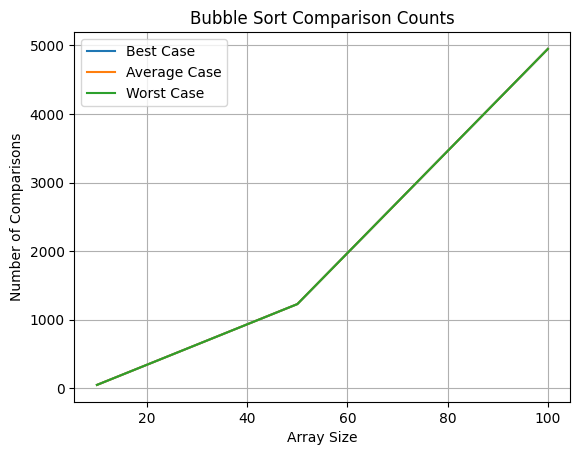

In [251]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

# Function to generate worst, average, and best case arrays of varying sizes

# Define the array sizes that you want to test
array_sizes = [10, 50, 100]
# Run sorting trials
num_trials = 1000
bubSortBest = runSortingTrials(array_sizes, genAsc, bubble_sort, num_trials=1)  # Best case for bubble sort is when the array is already sorted
bubSortAvg = runSortingTrials(array_sizes, genRand, bubble_sort, num_trials)  # Average case is random arrays
bubSortWorst = runSortingTrials(array_sizes, genDes, bubble_sort, num_trials=1)  # Worst case for bubble sort is when the array is sorted in reverse
# Plotting
plt.plot(array_sizes, bubSortBest, label='Best Case')
plt.plot(array_sizes, bubSortAvg, label='Average Case')
plt.plot(array_sizes, bubSortWorst, label='Worst Case')
plt.legend()
plt.title('Bubble Sort Comparison Counts')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

In Bubble sort, we can see due to the number of comparisons for each case that the runtime complexity of all the cases are of the same order. In this case, the runtime complexity is on the order of $\mathcal{O}(n^{2})$. The runtime complexities of each case do not differ in Bubble Sort, some modifications can be made to mitigate this, but more than likely the runtime is still going to be on the order of $\mathcal{O}(n^{2})$ no matter what is done.

----
### Merge Sort

For this algorithm, I referenced the [Geeks For Geeks](https://www.geeksforgeeks.org/python-program-for-merge-sort/) article that I found online while also comparing it with my code that I used in 2270.

In [252]:
""" merge_sort - Sorts an array of values using the merge sort algorithm
Input:
    a - Array of values to be sorted
Algorithm:
    * The function starts by calling a helper function named mergeSort, which is designed to recursively sort subsections of the array.
    * In mergeSort:
        * The function first checks if the current subsection of the array (defined by left and right indices) contains more than one element. This check serves as the recursion's base case.
            * It calculates the middle index of the current subsection to divide the array into two halves.
            * It calls itself recursively to sort the first half (from left to middle).
            * It calls itself recursively to sort the second half (from middle+1 to right).
            * After sorting both halves, it calls another helper function, merge, to merge these sorted halves into a single sorted subsection.
    * In merge:
        * Temporary arrays are created to hold the left and right halves of the current subsection.
        * Pointers are initialized to track the current position in the left half, right half, and the original array subsection being merged.
        * It iterates through both halves, comparing elements and copying the smaller element into the correct position in the original array subsection.
        * Once all elements in one half have been copied, any remaining elements in the other half are copied over.
        * This process effectively merges and sorts the subsection of the original array.
Output:
    a - The input array sorted in ascending order. The array 'a' is modified in place, and its sorted version is the final output. The sorting is done in ascending order.
"""
def merge_sort(a):
    def merge(a, left, middle, right):
        alpha = middle - left + 1
        beta = right - middle
        tempL = [0] * alpha
        tempR = [0] * beta
        for i in range(0, alpha):
            tempL[i] = a[left + i]
        for j in range(0, beta):
            tempR[j] = a[middle + 1 + j]
        i, j, k = 0, 0, left
        while i < alpha and j < beta:
            if tempL[i] <= tempR[j]:
                a[k] = tempL[i]
                i += 1
            else:
                a[k] = tempR[j]
                j += 1
            k += 1
        while i < alpha:
            a[k] = tempL[i]
            i += 1
            k += 1
        while j < beta:
            a[k] = tempR[j]
            j += 1
            k += 1
    def mergeSort(a, left, right):
        if left < right:
            middle = (left + (right - left) // 2)
            mergeSort(a, left, middle)
            mergeSort(a, middle + 1, right)
            merge(a, left, middle, right)
    return mergeSort(a, 0, len(a) - 1)



### Complexity Analysis of Merge Sort

The average, best, and worst case complexities of Merge Sort are all $\mathcal{O}(n\log{(n)})$. This because the merging of the lists in Merge Sort take $\mathcal{O}(n)$ time for each of the $\log{(n)}$ levels of recursion.

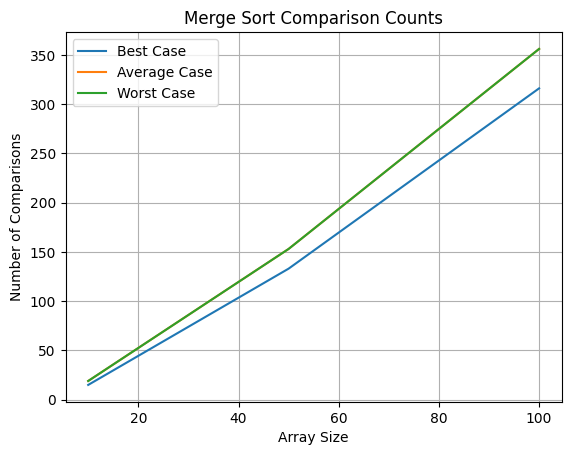

In [253]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
def merge_sort_comp(a):
    comparisons = [0]
    def merge(a, left, middle, right, comparisons):
        alpha = middle - left + 1
        beta = right - middle
        tempL = [0] * alpha
        tempR = [0] * beta
        for i in range(alpha):
            tempL[i] = a[left + i]
        for j in range(beta):
            tempR[j] = a[middle + 1 + j]
        i, j, k = 0, 0, left
        while i < alpha and j < beta:
            comparisons[0] += 1
            if tempL[i] <= tempR[j]:
                a[k] = tempL[i]
                i += 1
            else:
                a[k] = tempR[j]
                j += 1
            k += 1
        while i < alpha:
            a[k] = tempL[i]
            i += 1
            k += 1
        while j < beta:
            a[k] = tempR[j]
            j += 1
            k += 1
    def mergeSort(a, left, right, comparisons):
        if left < right:
            middle = (left + (right - left) // 2)
            mergeSort(a, left, middle, comparisons)
            mergeSort(a, middle + 1, right, comparisons)
            merge(a, left, middle, right, comparisons)
    mergeSort(a, 0, len(a) - 1, comparisons)
    return comparisons[0]

# Define the array sizes that you want to test
array_sizes = [10, 50, 100]
# Run sorting trials
num_trials = 1000
mergSortBest = runSortingTrials(array_sizes, genDes, merge_sort_comp, num_trials=1)
mergSortAvg = runSortingTrials(array_sizes, genAsc, merge_sort_comp, num_trials=1)
mergSortWorst = runSortingTrials(array_sizes, genMSWorst, merge_sort_comp, num_trials=1)
# Plotting
plt.plot(array_sizes, mergSortBest, label='Best Case')
plt.plot(array_sizes, mergSortAvg, label='Average Case')
plt.plot(array_sizes, mergSortWorst, label='Worst Case')
plt.legend()
plt.title('Merge Sort Comparison Counts')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

In this example, for the worst case we are using an array that consists of all the same number. For average and best cases, we are using an array that is already sorted and one that is sorted in descending order. Upon examination of this, we can see that the worst case of merge sort results in just slightly more comparisons than the average and best cases. Both of these complexities are of $\mathcal{O}(n \log{(n)})$. We can show that the time complexity of merge sort with the master method:

$$
T(n) = 2T(n / 2) + \Theta(n)
$$

In this case, $\log_{b}{(a)} = \log_{2}{(2)} = 1$. In this case, $\log_{2}({2}) = c$ where $c = 1$ in $\mathcal{O}(n^{c})$, therefore our solution to this recurrence relation is going to be of the form

$$
\Theta(n^{\log_{b}{(a)}}\log{(n)}).
$$

Plugging in the values we find

$$
T(n) = \Theta(n\log{(n)}).
$$

----
### Quick Sort


In [254]:
""" quick_sort - Sorts an array of values using the quick sort algorithm
Input:
    a - Array of values to be sorted
Algorithm:
    * The quickSort function is defined to apply the quick sort algorithm on a segment of the array:
        - The function first checks if the segment to be sorted (defined by the low and high indices) is valid (i.e., has more than one element).
        - It then calls the partition function to rearrange the elements around a pivot chosen from within the segment. This pivot effectively splits the array segment into two parts:
            * Elements less than the pivot are moved to its left.
            * Elements greater than the pivot are moved to its right.
        - The partition function:
            * Chooses the middle element of the segment as the pivot for simplicity and to avoid worst-case performance on already sorted arrays.
            * Initializes two pointers: left starting from the low end of the segment and right starting from the high end.
            * Moves the left pointer to the right until an element greater than the pivot is found.
            * Moves the right pointer to the left until an element less than the pivot is found.
            * If the left pointer is still to the left of the right pointer, the elements at these pointers are swapped, and the process is repeated.
            * Once the left pointer crosses the right pointer, the function returns the position of the right pointer, which indicates the new pivot position where the array is partitioned.
        - After partitioning, the quickSort function is recursively called first for the segment of the array before the new pivot position and then for the segment after the pivot position, 
        effectively applying the quick sort algorithm to smaller and smaller segments of the array until the entire array is sorted.
    * The sorting process is initiated by calling the quickSort function with the initial indices of the array (0 and the last index).
Output:
    a - The input array sorted in ascending order. The sorting is done in place, modifying the original array.
"""
def quick_sort(a):
    def partition(a, low, high):
        pivot = a[low + (high - low) // 2]
        left = low
        right = high
        while True:
            while a[left] < pivot:
                left += 1
            while a[right] > pivot:
                right -= 1
            if left >= right:
                return right
            a[left], a[right] = a[right], a[left]
            left += 1
            right -= 1
    def quickSort(a, low, high):
        if low < high:
            part = partition(a, low, high)
            quickSort(a, low, part)
            quickSort(a, part + 1, high)
    quickSort(a, 0, len(a) - 1)
    return a



### Complexity Analysis of Quick Sort

The complexity of Quick Sort in the average and best cases are known to be $\mathcal{O}(n\log{(n)})$. The worst case complexity of Quick Sort is known to be $\mathcal{O}(n^{2})$. In building this algorithm, I used [Geeks For Geeks](https://www.geeksforgeeks.org/python-program-for-quicksort/) along with referencing my code that I used for this problem in 2270.


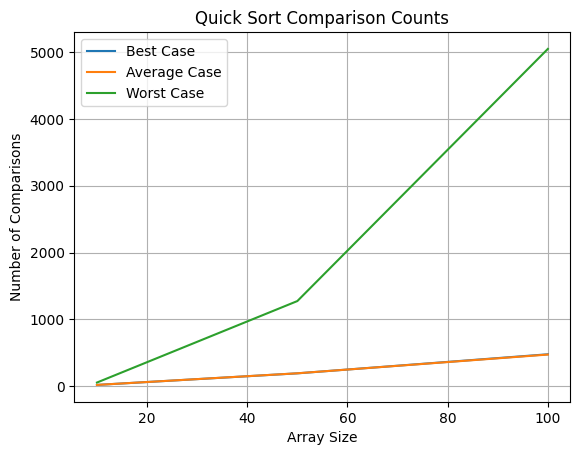

In [255]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
def quick_sort_comp(a):
    comparisons = [0]
    def partition(a, low, high, comparisons):
        pivot = a[low + (high - low) // 2]
        left = low
        right = high
        while True:
            while a[left] < pivot:
                comparisons[0] += 1
                left += 1
            while a[right] > pivot:
                comparisons[0] += 1
                right -= 1
            if left >= right:
                return right
            a[left], a[right] = a[right], a[left]
            left += 1
            right -= 1
    def quickSort(a, low, high, comparisons):
        if low < high:
            part = partition(a, low, high, comparisons)
            quickSort(a, low, part, comparisons)
            quickSort(a, part + 1, high, comparisons)
    quickSort(a, 0, len(a) - 1, comparisons)
    return comparisons[0]
def quick_sort_comp_w(a):
    comparisons = [0]
    def partition(a, low, high, comparisons):
        pivot = a[high]
        left = low
        right = high - 1
        while True:
            while a[left] < pivot:
                comparisons[0] += 1
                left += 1
            while a[right] > pivot:
                comparisons[0] += 1
                right -= 1
            if left >= right:
                comparisons[0] += 1
                return right
            a[left], a[right] = a[right], a[left]
            left += 1
            right -= 1
    def quickSort(a, low, high, comparisons):
        if low < high:
            part = partition(a, low, high, comparisons)
            quickSort(a, low, part, comparisons)
            quickSort(a, part + 1, high, comparisons)
    quickSort(a, 0, len(a) - 1, comparisons)
    return comparisons[0]
# Define the array sizes that you want to test
array_sizes = [10, 50, 100]
# Run sorting trials
num_trials = 1000
quickSortBest = runSortingTrials(array_sizes, genRand, quick_sort_comp, num_trials)
quickSortAvg = runSortingTrials(array_sizes, genRand, quick_sort_comp, num_trials)
quickSortWorst = runSortingTrials(array_sizes, genAsc, quick_sort_comp_w, num_trials)
# Plotting
plt.plot(array_sizes, quickSortBest, label='Best Case')
plt.plot(array_sizes, quickSortAvg, label='Average Case')
plt.plot(array_sizes, quickSortWorst, label='Worst Case')
plt.legend()
plt.title('Quick Sort Comparison Counts')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

We can see that has the array size blows up, the worst case is going to approach $\mathcal{O}(n^{2})$. The other complexities are on the order of $\mathcal{O}(n\log{(n)})$. In the case of quicksort, the worst case occurs when the array is sorted in descending order and the pivot is selected as the last element of the array. We can see the clear distinction of how quick sort approaches $\mathcal{O}(n^{2})$.

When the pivot is selected poorly in Quick Sort, we get a recurrence relation that looks something like

\begin{align}
T(n) & = T(n - 1) + \Theta(n) \\
& = T(n - 2) + \Theta(n - 1) \Theta(n) \\
& = T(n - 3) + \Theta(n - 2) + \Theta(n - 1) \Theta(n) \\
& = \dots \\
& = \Theta(1) + \Theta(2) + \dots + \Theta(n) \\
& = \Theta(\sum_{i = 1}^{n} i) \\
& = \Theta(\frac{n(n + 1)}{2}) \\
& = \Theta(n^{2})
\end{align}

which will result in a worst case runtime of $\mathcal{O}(n^{2})$.

-----
## Testing Code: Do not edit



In [256]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [257]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [258]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [259]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [260]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
